# Magnetic Data Procesing

**The magnetic survey was conducted in a grid pattern with an interval of 100 m. The appending files contain this survey's raw magnetic data and base magnetometer readings with respective times.** <p>
**a) Plot the raw magnetic data.** <BR>
**b) Process the raw magnetic data by applying necessary corrections (Diurnal and IGRF corrections).**<BR>
**c) Plot the Diurnal curve for the entire period of the survey.**<BR>
**d) Plot the processed magnetic data.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1=pd.read_table('BASE-MAGNETIC-READINGS-13FEB2023.txt',delim_whitespace= True)
f2=pd.read_table('RAW-MAG-DATA-DIST-13FEB2023-100M-100M-TIME-15-30.txt',delim_whitespace= True)

##### Pre-processing of Data

In [3]:
f1

,TIME-H,TIME-M,TIME-S,BASE-MAG-READINGS
0,8,30,2,46653.128
1,8,31,2,46652.628
2,8,32,2,46652.028
3,8,33,2,46652.028
4,8,34,2,46651.628
...,...,...,...,...
446,15,56,2,46634.628
447,15,57,2,46634.828
448,15,58,2,46634.928
449,15,59,2,46635.428


In [4]:
f1['Time']=pd.to_datetime(f1['TIME-H'].astype(str)+':'+f1['TIME-M'].astype(str),format='%H:%M').dt.time
f1

,TIME-H,TIME-M,TIME-S,BASE-MAG-READINGS,Time
0,8,30,2,46653.128,08:30:00
1,8,31,2,46652.628,08:31:00
2,8,32,2,46652.028,08:32:00
3,8,33,2,46652.028,08:33:00
4,8,34,2,46651.628,08:34:00
...,...,...,...,...,...
446,15,56,2,46634.628,15:56:00
447,15,57,2,46634.828,15:57:00
448,15,58,2,46634.928,15:58:00
449,15,59,2,46635.428,15:59:00


In [5]:
f2 # 100x100

,X(m),Y(m),TIME,AM/PM,RAW-MAG,IGRF
0,0,0,8:44,AM,46621.14,46381.2
1,100,0,8:48,AM,46595.78,46388.8
2,200,0,8:52,AM,46642.70,46396.4
3,300,0,8:56,AM,46687.13,46404.0
4,400,0,9:00,AM,46703.25,46411.5
...,...,...,...,...,...,...
95,500,900,3:32,PM,47083.70,46881.6
96,600,900,3:36,PM,47023.86,46889.2
97,700,900,3:40,PM,47085.55,46896.8
98,800,900,3:44,PM,47100.99,46904.3


In [6]:
j=f2.iloc[:,2]+f2.iloc[:,3]
j=np.array(j)
j=pd.to_datetime(j).strftime('%H:%M:%S')
del f2['TIME']; del f2['AM/PM']
f2['Time']=j
f2

,X(m),Y(m),RAW-MAG,IGRF,Time
0,0,0,46621.14,46381.2,08:44:00
1,100,0,46595.78,46388.8,08:48:00
2,200,0,46642.70,46396.4,08:52:00
3,300,0,46687.13,46404.0,08:56:00
4,400,0,46703.25,46411.5,09:00:00
...,...,...,...,...,...
95,500,900,47083.70,46881.6,15:32:00
96,600,900,47023.86,46889.2,15:36:00
97,700,900,47085.55,46896.8,15:40:00
98,800,900,47100.99,46904.3,15:44:00


### a) Plot of Raw magnetic Data

In [7]:
m1=len(f2.iloc[:,0].unique())
n1=len(f2.iloc[:,1].unique())
f2x=np.array(f2.iloc[:,0]).reshape(m1,n1)
f2y=np.array(f2.iloc[:,1]).reshape(m1,n1)
f2z=np.array(f2.iloc[:,-3]).reshape(m1,n1)

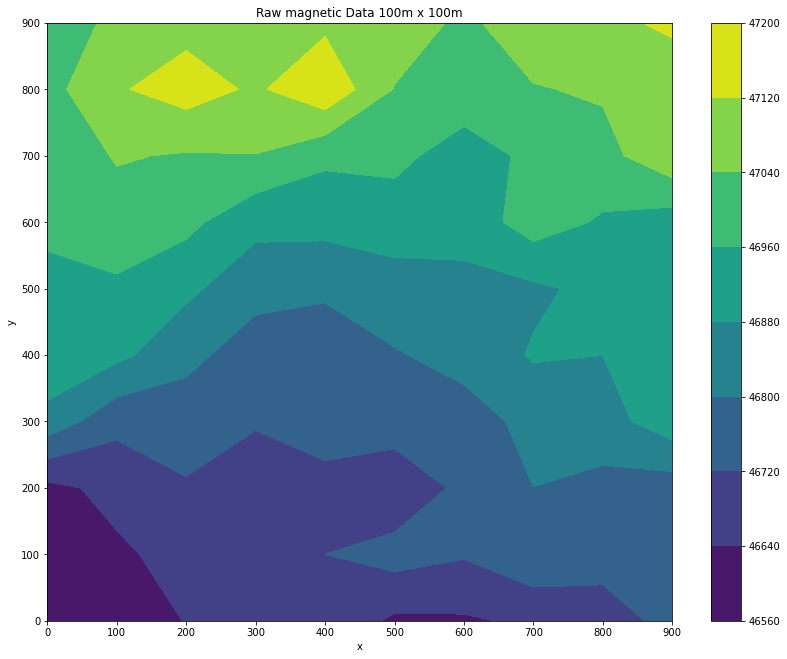

In [8]:
fig, ax = plt.subplots(1,1, figsize=(14,11))
c=ax.contourf(f2x,f2y,f2z) 
ax.set_title('Raw magnetic Data 100m x 100m')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(c)
plt.show()

### b) Processing Raw data

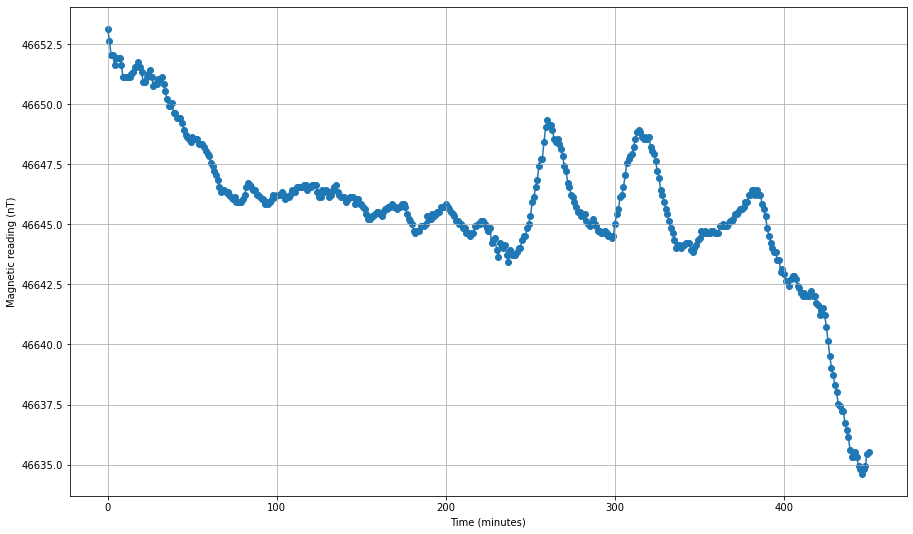

In [9]:
# diurnal correction / time in minutes
time=np.arange(0,451,1)
plt.figure(figsize=(15,9))
plt.plot(time,f1.iloc[:,-2])
plt.scatter(time,f1.iloc[:,-2])
plt.xlabel('Time (minutes)')
plt.ylabel('Magnetic reading (nT)')
plt.grid()

In [10]:
kq=pd.DataFrame(f1.iloc[14:439,-1].astype(str))
kq['an']=f1.iloc[14:439,-2]
kq.reset_index(inplace=True)
kq.drop(columns='index',inplace=True)
kq.head()

,Time,an
0,08:44:00,46651.228
1,08:45:00,46651.328
2,08:46:00,46651.528
3,08:47:00,46651.528
4,08:48:00,46651.728


In [11]:
j=f1.iloc[13:441,-2]
jl=np.array(j)
# Diurnal rate at index 1 = (reading(2)-reading(0))/2
kn=[]
for i in range(1,len(jl)+2):
    if i<=425:
        k=(jl[i+2]-jl[i])/2
        kn.append(k)

In [12]:
len(kn)

425

In [13]:
kq['Diurnal rate']=kn # rate/min
kq.head()

,Time,an,Diurnal rate
0,08:44:00,46651.228,0.15
1,08:45:00,46651.328,0.10
2,08:46:00,46651.528,0.10
3,08:47:00,46651.528,0.00
4,08:48:00,46651.728,-0.20


#### 100 m x 100 m

In [14]:
m=[]
for j in range(len(kq['Time'])):
    for i in range(len(f2['Time'])):
        if kq['Time'][j]==f2['Time'][i]:
            mm=kq['Diurnal rate'][j]
            m.append(mm)
            
f2['D_rate']=m
f2.head()

,X(m),Y(m),RAW-MAG,IGRF,Time,D_rate
0,0,0,46621.14,46381.2,08:44:00,0.15
1,100,0,46595.78,46388.8,08:48:00,-0.20
2,200,0,46642.70,46396.4,08:52:00,0.15
3,300,0,46687.13,46404.0,08:56:00,-0.15
4,400,0,46703.25,46411.5,09:00:00,0.05


In [15]:
#calculate the time difference between successive readings
km=[]
for i in range(len(f2['Time'])-1):
    k=pd.to_datetime(f2['Time'][i+1])-pd.to_datetime(f2['Time'][i])
    k=str(k)
    k=int(k[-4])
    km.append(k)
km.insert(0,0)   
f2['Dir_Corr']=km*f2['D_rate']

In [16]:
f2['Anomaly']=f2['RAW-MAG']-f2['IGRF']-f2['Dir_Corr']
f2.head()

,X(m),Y(m),RAW-MAG,IGRF,Time,D_rate,Dir_Corr,Anomaly
0,0,0,46621.14,46381.2,08:44:00,0.15,0.0,239.94
1,100,0,46595.78,46388.8,08:48:00,-0.20,-0.8,207.78
2,200,0,46642.70,46396.4,08:52:00,0.15,0.6,245.70
3,300,0,46687.13,46404.0,08:56:00,-0.15,-0.6,283.73
4,400,0,46703.25,46411.5,09:00:00,0.05,0.2,291.55


### c) Diurnal curve for period of survey

In [17]:
mk=[]
for j in range(len(kq['Time'])):
    for i in range(len(f2['Time'])):
        if kq['Time'][j]==f2['Time'][i]:
            mm=kq['an'][j]
            mk.append(mm)

In [18]:
tm=[]
p=0
for i in range(len(km)):
    p+=km[i]
    tm.append(p)

Text(0.5, 1.0, 'Diurnal Curve for survey period')

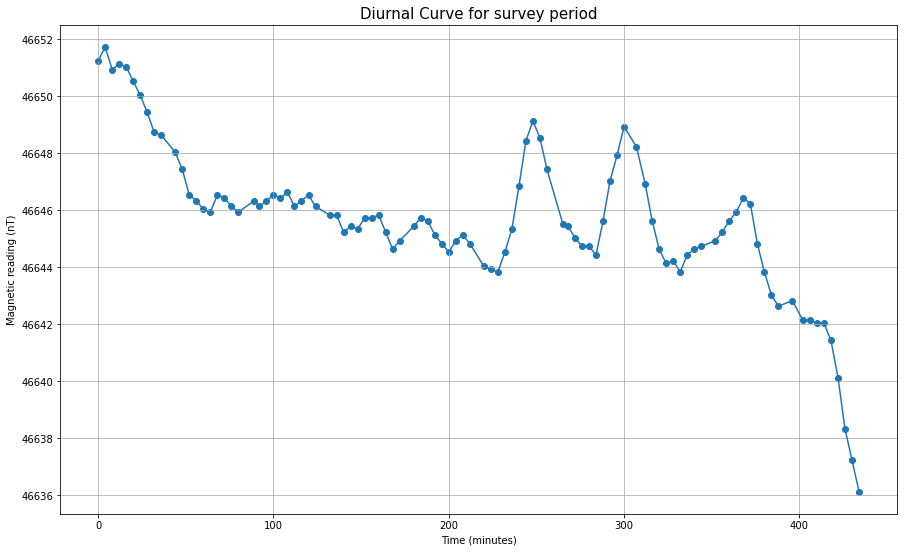

In [19]:
plt.figure(figsize=(15,9))
plt.grid()
plt.plot(tm,mk)
plt.scatter(tm,mk)
plt.xlabel('Time (minutes)')
plt.ylabel('Magnetic reading (nT)')
plt.title('Diurnal Curve for survey period',fontsize=15)

### d) Plot of processed magnetic data

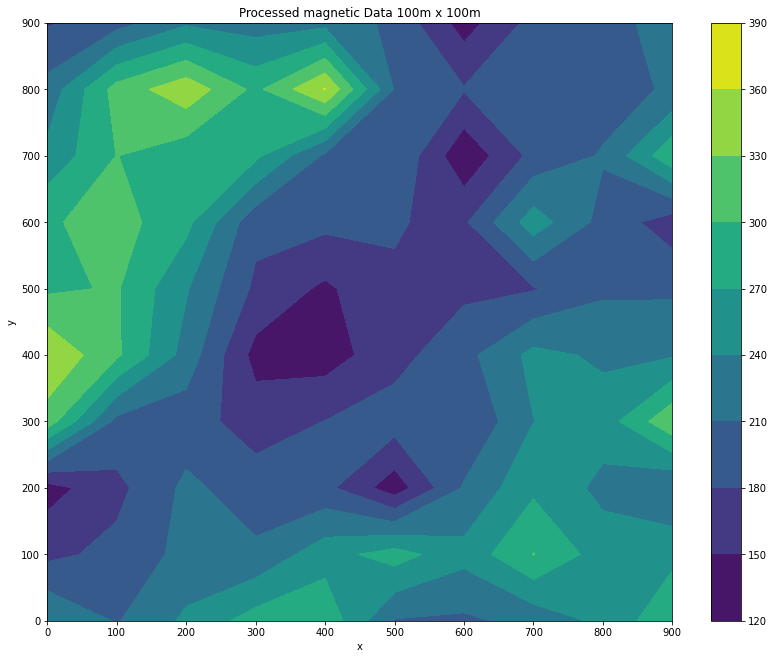

In [20]:
f2zp=np.array(f2['Anomaly']).reshape(10,10)
#plot
fig, ax = plt.subplots(1,1, figsize=(14,11))
c=ax.contourf(f2x,f2y,f2zp)
ax.set_title('Processed magnetic Data 100m x 100m')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(c)
plt.show()